LINEAR & LASSO REGRESSION MODEL precio del auto teniendo al año, fuel type etc, // ES MAS DE ES O NO ES LO QUE PREDICE

In [24]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


In [2]:
car_df= pd.read_csv('C:/Users/Usuario/Desktop/data/siddhardhan/files/car data.csv')
car_df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [4]:
car_df.shape

(301, 9)

In [5]:
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
#distribution od category
car_df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [8]:
car_df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [9]:
car_df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [10]:
#cambiamos a vaor numerico para que entienda el machine learning
car_df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2 }}, inplace=True)

car_df.replace({'Seller_Type':{'Dealer':0, 'Individual':1 }}, inplace=True)

car_df.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [11]:
X= car_df.drop(['Selling_Price', 'Car_Name' ], axis=1)
Y= car_df['Selling_Price']


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=2 )

In [18]:
#model training
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)


LinearRegression()

In [19]:
#prediccion
training_data_prediction = lin_reg_model.predict(X_train)

In [20]:
#comparamos predicion con entrenamiento
error_score = metrics.r2_score(Y_train, training_data_prediction)
error_score
#r2 score necesita mas que un 80 para ser preciso, no como el accuracy

0.8799451660493695

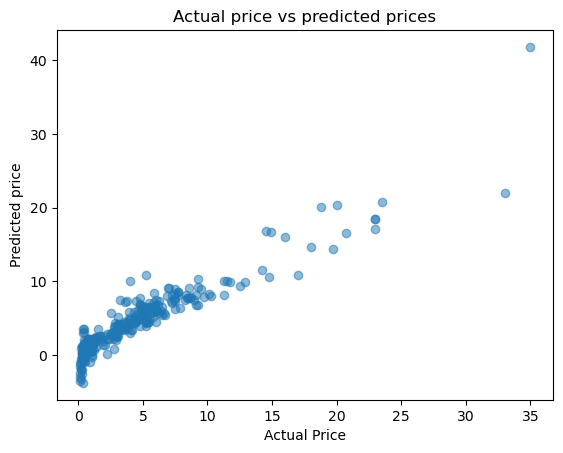

In [25]:
plt.scatter(Y_train, training_data_prediction, alpha=0.5)

plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.title('Actual price vs predicted prices')
plt.show()



In [26]:
test_data_prediction = lin_reg_model.predict(X_test)
#comparamos predicion con entrenamiento
error_score = metrics.r2_score(Y_test, test_data_prediction)
error_score

0.8365766715026903